In [ ]:
# import header files
%matplotlib inline
import torch
import torch.nn as nn
import torchvision
from functools import partial
from dataclasses import dataclass
from collections import OrderedDict
import glob
import os
import random
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import time
import copy
import tqdm
import torch
import random
from PIL import Image
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset,DataLoader

In [ ]:
# load my google drive
import os
def auth_gdrive():
  from google.colab import drive
  if os.path.exists('content/gdrive/My Drive'): return
  drive.mount('/content/gdrive')
def load_gdrive_dataset():
  loader_assets = 'OurPollen13K.zip'
  auth_gdrive()

In [ ]:
# mount my google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
load_gdrive_dataset()

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# unzip  dataset
!unzip "/content/gdrive/MyDrive/OurPollen13K.zip"

Streaming output truncated to the last 5000 lines.
  inflating: OurPollen13K/train/3/20190404112008_OBJ_15_854_564.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_18_180_457.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_1_694_901.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_20_1060_330.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_25_61_172.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_26_290_122.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_28_909_101.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_29_989_69.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_30_588_48.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_33_1154_444.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_3_913_871.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_4_159_824.png  
  inflating: OurPollen13K/train/3/20190404112008_OBJ_5_527_810.png  
  inflating: OurPollen13K/train/3/2019040411

In [ ]:
# training set
train_class_1 = os.listdir("/content/OurPollen13K/train/1/")
train_class_1_samples = len(train_class_1)
print("The number of samples in the train_class_1 is:", train_class_1_samples)
train_class_2 = os.listdir("/content/OurPollen13K/train/2/")
train_class_2_samples = len(train_class_2)
print("The number of samples in the train_class_2 is:", train_class_2_samples)
train_class_3 = os.listdir("/content/OurPollen13K/train/3/")
train_class_3_samples = len(train_class_3)
print("The number of samples in the train_class_3 is:", train_class_3_samples)
train_class_4 = os.listdir("/content/OurPollen13K/train/4/")
train_class_4_samples = len(train_class_4)
print("The number of samples in the train_class_4 is:", train_class_4_samples)
number_trainingset = len(train_class_1+train_class_2+train_class_3+train_class_4)
print("\n""The number of samples in the training set is:", number_trainingset)
# validation set
validation_class_1 = os.listdir("/content/OurPollen13K/validation/1/")
validation_class_1_samples = len(validation_class_1)
print("\n""The number of samples in the validation_class_1 is:", validation_class_1_samples)
validation_class_2 = os.listdir("/content/OurPollen13K/validation/2/")
validation_class_2_samples = len(validation_class_2)
print("The number of samples in the validation_class_2 is:", validation_class_2_samples)
validation_class_3 = os.listdir("/content/OurPollen13K/validation/3/")
validation_class_3_samples = len(validation_class_3)
print("The number of samples in the validation_class_3 is:", validation_class_3_samples)
validation_class_4 = os.listdir("/content/OurPollen13K/validation/4/")
validation_class_4_samples = len(validation_class_4)
print("The number of samples in the validation_class_4 is:", validation_class_4_samples)
number_validationset = len(validation_class_1+validation_class_2+validation_class_3+validation_class_4)
print("\n""The number of samples in the validation set is:", number_validationset)
# test set
test_class_1 = os.listdir("/content/OurPollen13K/test/1/")
test_class_1_samples = len(test_class_1)
print("\n""The number of samples in the test_class_1 is:", test_class_1_samples)
test_class_2 = os.listdir("/content/OurPollen13K/test/2/")
test_class_2_samples = len(test_class_2)
print("The number of samples in the test_class_2 is:", test_class_2_samples)
test_class_3 = os.listdir("/content/OurPollen13K/test/3/")
test_class_3_samples = len(test_class_3)
print("The number of samples in the test_class_3 is:", test_class_3_samples)
test_class_4 = os.listdir("/content/OurPollen13K/test/4/")
test_class_4_samples = len(test_class_4)
print("The number of samples in the test_class_4 is:", test_class_4_samples)
number_testset = len(test_class_1+test_class_2+test_class_3+test_class_4)
print("\n""The number of samples in the test set is:", number_testset)

The number of samples in the train_class_1 is: 1409
The number of samples in the train_class_2 is: 700
The number of samples in the train_class_3 is: 7394
The number of samples in the train_class_4 is: 652

The number of samples in the training set is: 10155

The number of samples in the validation_class_1 is: 157
The number of samples in the validation_class_2 is: 73
The number of samples in the validation_class_3 is: 822
The number of samples in the validation_class_4 is: 72

The number of samples in the validation set is: 1124

The number of samples in the test_class_1 is: 277
The number of samples in the test_class_2 is: 136
The number of samples in the test_class_3 is: 1450
The number of samples in the test_class_4 is: 128

The number of samples in the test set is: 1991


In [ ]:
# define transforms
train_transforms = torchvision.transforms.Compose([torchvision.transforms.RandomRotation(30),
                                       torchvision.transforms.Resize((84, 84)),
                                       torchvision.transforms.RandomHorizontalFlip(),
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [ ]:
# get data
train_data = torchvision.datasets.ImageFolder("/content/OurPollen13K/train/", transform=train_transforms)
validation_data = torchvision.datasets.ImageFolder("/content/OurPollen13K/validation/", transform=train_transforms)
test_data = torchvision.datasets.ImageFolder("/content/OurPollen13K/test/", transform=train_transforms)

In [ ]:
# data loader
trainloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, num_workers=1, pin_memory=True)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=16, shuffle=True, num_workers=1, pin_memory=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True, num_workers=1, pin_memory=True)

Labels:  ['1', '3', '3', '3', '3', '3', '2', '1', '3', '3', '3', '3', '3', '3', '4', '3']


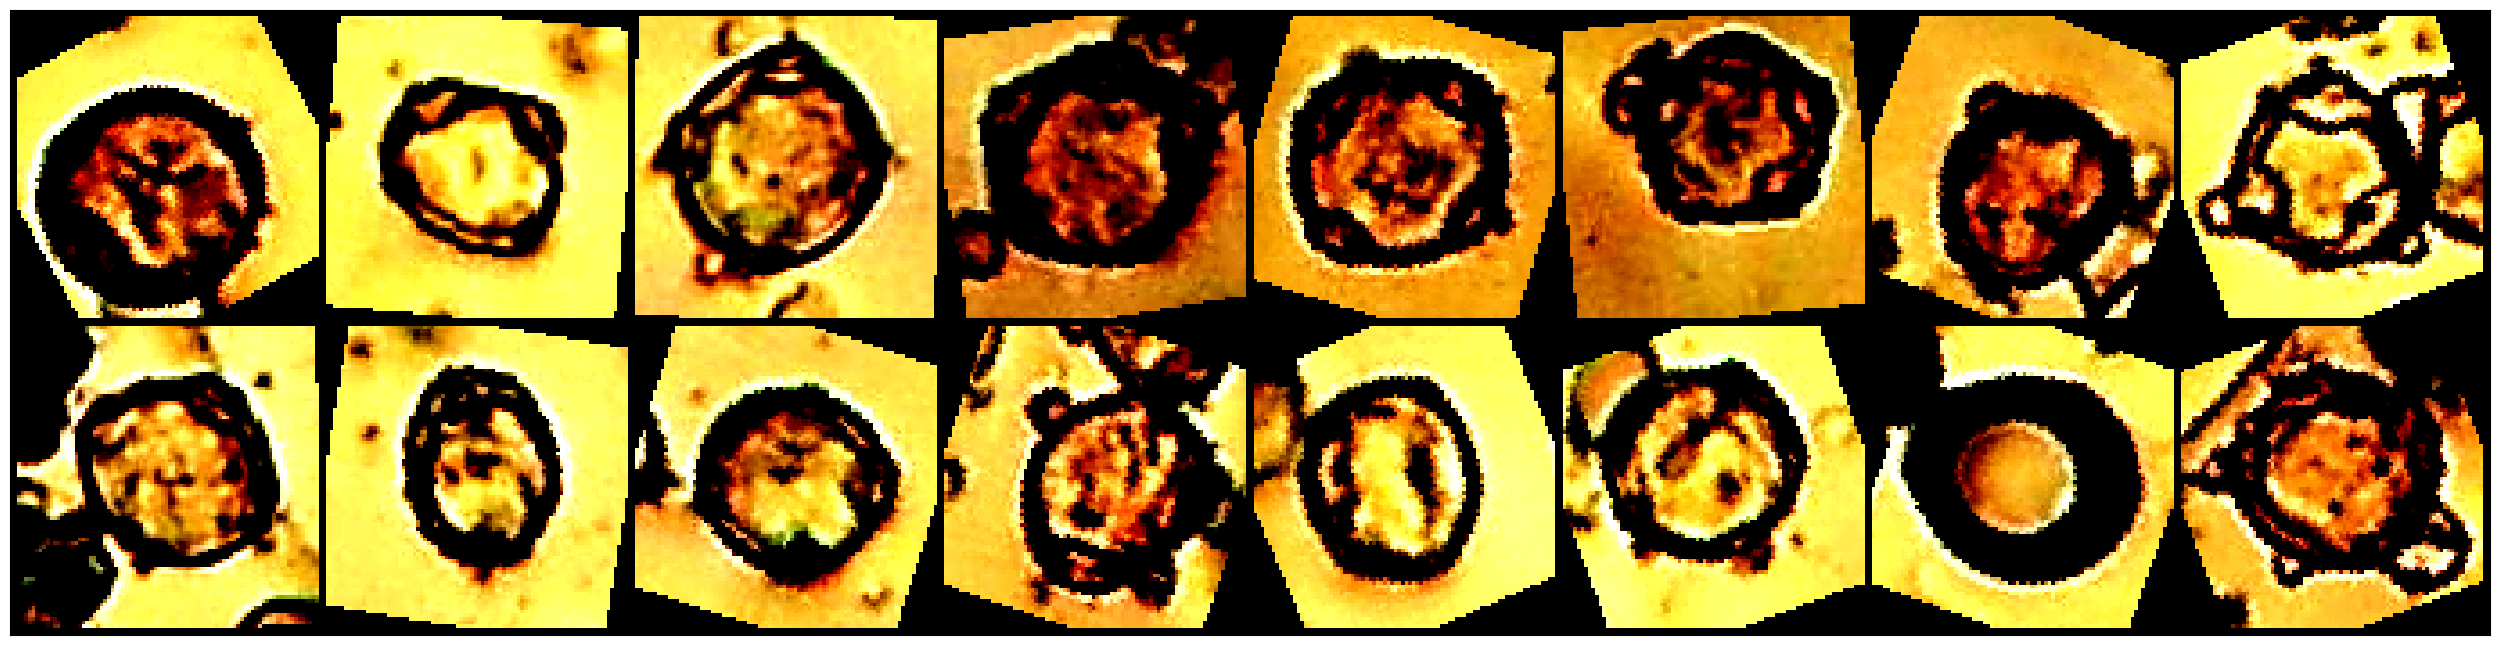

In [ ]:
# Create a list of our detection classes
classes = ["1", "2", "3", "4"]
# plot random a batch images
from torchvision.utils import make_grid
def show_batch(dl, classes):
  for data, labels in dl:
    fig, ax = plt.subplots(figsize=(32, 16))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(data[:32], nrow=8).squeeze().permute(1, 2, 0).clamp(0,1))
    print('Labels: ', list(map(lambda l: classes[l], labels)))
    break
show_batch(trainloader, classes)

In [ ]:
# define the suggested attention block (VDAB)
class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc1   = nn.Conv2d(in_planes, in_planes // 16, 1, bias=False)
        self.relu1 = nn.ReLU()
        self.fc2   = nn.Conv2d(in_planes // 16, in_planes, 1, bias=False)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        avg_out = self.fc2(self.relu1(self.fc1(self.avg_pool(x))))
        max_out = self.fc2(self.relu1(self.fc1(self.max_pool(x))))
        out = avg_out + max_out
        return self.sigmoid(out)
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=3):
        super(SpatialAttention, self).__init__()
        assert kernel_size in (3, 7), 'kernel size must be 3 or 7'
        padding = 1 if kernel_size == 3 else 3
        self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv1(x)
        return self.sigmoid(x)
class VDAB(nn.Module):
    def __init__(self, in_planes):
        super(VDAB, self).__init__()
        self.ca = ChannelAttention(in_planes)
        self.sa = SpatialAttention()
    def forward(self, x):
        out = x * (self.ca(x))
        out = out * (self.sa(out))
        return out

In [ ]:
# define the proposed method (RCA-Net)
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

        self.vdab = VDAB(planes)

    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out = self.vdab(out)
        out += self.shortcut(residual)
        out = F.relu(out)
        return out

class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion*planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

        self.vdab = VDAB(self.expansion*planes)

    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out = self.vdab(out)
        out += self.shortcut(residual)
        out = F.relu(out)
        return out

class ResNetVDAB(nn.Module):
    def __init__(self, block, num_blocks, num_classes=4):
        super(ResNetVDAB, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(2048*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

def ResNet18VDAB():
    return ResNetVDAB(BasicBlock, [2,2,2,2])

In [ ]:
# print the model
import math
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18VDAB()
model.to(device)

ResNetVDAB(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
      (vdab): VDAB(
        (ca): ChannelAttention(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (max_pool): AdaptiveMaxPool2d(output_size=1)
          (fc1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (relu1): ReLU()
          (fc2): Conv2d(4, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (sigmoid)

In [ ]:
# print summary of the model
from torchvision import models
from torchsummary import summary
summary(model, (3, 84, 84))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 84, 84]           1,728
       BatchNorm2d-2           [-1, 64, 84, 84]             128
            Conv2d-3           [-1, 64, 84, 84]          36,864
       BatchNorm2d-4           [-1, 64, 84, 84]             128
            Conv2d-5           [-1, 64, 84, 84]          36,864
       BatchNorm2d-6           [-1, 64, 84, 84]             128
 AdaptiveAvgPool2d-7             [-1, 64, 1, 1]               0
            Conv2d-8              [-1, 4, 1, 1]             256
              ReLU-9              [-1, 4, 1, 1]               0
           Conv2d-10             [-1, 64, 1, 1]             256
AdaptiveMaxPool2d-11             [-1, 64, 1, 1]               0
           Conv2d-12              [-1, 4, 1, 1]             256
             ReLU-13              [-1, 4, 1, 1]               0
           Conv2d-14             [-1, 6

In [ ]:
# loss function to be used
criterion = torch.nn.CrossEntropyLoss()
# optimizer to be used
optimizer = torch.optim.SGD(model.parameters(), lr=5e-3, momentum=0.9, weight_decay=5e-4)

In [ ]:
# training process
from torch.utils.tensorboard import SummaryWriter
train_losses = 0.0
train_accuracy = 0
epochs = 50
for epoch in range(epochs):  # loop over the dataset multiple times
    print('Epoch-{0}:'.format(epoch + 1, optimizer.param_groups[0]['lr']))
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data # get the inputs; data is a list of [inputs, labels]
        inputs, labels = inputs.cuda(), labels.cuda() # for using data in GPU
        optimizer.zero_grad() # zero the parameter gradients
        outputs = model(inputs) # forward
        loss = criterion(outputs, labels) # calculate loss
        loss.backward() # backward loss
        optimizer.step() # optimize gradients
        train_losses += loss.item() # save loss
        _, preds = torch.max(outputs, 1) # save prediction
        train_accuracy += torch.sum(preds == labels.data) # save train_accuracy
        if i % 1000 == 999:    # every 1000 mini-batches...
            steps = epoch * len(trainloader) + i # calculate steps
            batch = i*batch_size # calculate batch
            print("training loss {:.5} training accuracy {:.5} Steps: {}".format(train_losses / batch, train_accuracy/batch, steps))
            # Save train_accuracy and loss to Tensorboard
            writer.add_scalar('training loss by steps', train_losses / batch, steps)
            writer.add_scalar('training accuracy by steps', train_accuracy / batch, steps)
    print("training accuracy: {}/{} ({:.5} %) training Loss: {:.5}".format(train_accuracy, len(trainloader), 100. * train_accuracy / len(trainloader.dataset), train_losses / len(trainloader.dataset)))
    train_losses = 0.0
    train_accuracy = 0
print('training is finished...')

In [ ]:
# validation process
from torch.utils.tensorboard import SummaryWriter
validation_losses = 0.0
validation_accuracy = 0
epochs = 50
for epoch in range(epochs):  # loop over the dataset multiple times
    print('Epoch-{0}:'.format(epoch + 1, optimizer.param_groups[0]['lr']))
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data # get the inputs; data is a list of [inputs, labels]
        inputs, labels = inputs.cuda(), labels.cuda() # for using data in GPU
        optimizer.zero_grad() # zero the parameter gradients
        outputs = model(inputs) # forward
        loss = criterion(outputs, labels) # calculate loss
        loss.backward() # backward loss
        optimizer.step() # optimize gradients
        validation_losses += loss.item() # save loss
        _, preds = torch.max(outputs, 1) # save prediction
        validation_accuracy += torch.sum(preds == labels.data) # save validation_accuracy
        if i % 1000 == 999:    # every 1000 mini-batches...
            steps = epoch * len(trainloader) + i # calculate steps
            batch = i*batch_size # calculate batch
            print("validation loss {:.5} validation accuracy {:.5} Steps: {}".format(validation_losses / batch, train_accuracy/batch, steps))
            # Save train_accuracy and loss to Tensorboard
            writer.add_scalar('validation loss by steps', validation_losses / batch, steps)
            writer.add_scalar('validation accuracy by steps', validation_accuracy / batch, steps)
    print("validation accuracy: {}/{} ({:.5} %) validation loss: {:.5}".format(validation_accuracy, len(validationloader), 100. * validation_accuracy / len(validationloader.dataset), validation_losses / len(validationloader.dataset)))
    validation_losses = 0.0
    validation_accuracy = 0
print('validation is finished...')

In [ ]:
# test proess
from torch.utils.tensorboard import SummaryWriter
test_losses = 0.0
test_accuracy = 0
epochs = 50
for epoch in range(epochs):  # loop over the dataset multiple times
    print('Epoch-{0}:'.format(epoch + 1, optimizer.param_groups[0]['lr']))
    for i, data in enumerate(testloader, 0):
        inputs, labels = data # get the inputs; data is a list of [inputs, labels]
        inputs, labels = inputs.cuda(), labels.cuda() # for using data in GPU
        optimizer.zero_grad() # zero the parameter gradients
        outputs = model(inputs) # forward
        loss = criterion(outputs, labels) # calculate loss
        loss.backward() # backward loss
        optimizer.step() # optimize gradients
        test_losses += loss.item() # save loss
        _, preds = torch.max(outputs, 1) # save prediction
        test_accuracy += torch.sum(preds == labels.data) # save test_accuracy
        if i % 1000 == 999:    # every 1000 mini-batches...
            steps = epoch * len(testloader) + i # calculate steps
            batch = i*batch_size # calculate batch
            print("test loss {:.5} test accuracy {:.5} Steps: {}".format(test_losses / batch, test_accuracy/batch, steps))
            # Save test_accuracy and loss to Tensorboard
            writer.add_scalar('test loss by steps', test_losses / batch, steps)
            writer.add_scalar('test accuracy by steps', test_accuracy / batch, steps)
    print("test accuracy: {}/{} ({:.5} %) test loss: {:.5}".format(test_accuracy, len(testloader), 100. * test_accuracy / len(testloader.dataset), test_losses / len(testloader.dataset)))
    test_losses = 0.0
    test_accuracy = 0
print('test is Finished...')

In [ ]:
# test confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sn
import pandas as pd
y_pred = []
y_true = []
# iterate over test data
for inputs, labels in testloader:
        inputs, labels = inputs.cuda(), labels.cuda()
        output = model(inputs) # Feed Network
        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(cmap=plt.cm.Greys)

An image of class1 (Corylus avellana_well developed):


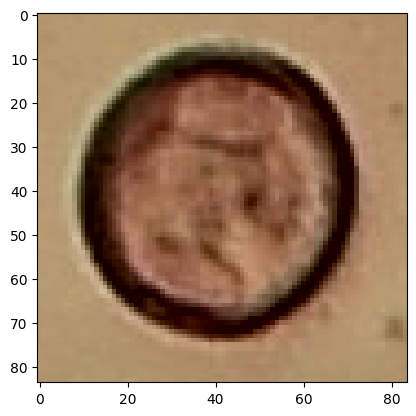

In [ ]:
import tensorflow
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
image = load_img('/content/OurPollen13K/train/1/20190402165648_OBJ_0_1099_759.png')
data = img_to_array(image)
samples = np.expand_dims(data, 0)
print('An image of class1 (Corylus avellana_well developed):')
plt.imshow(image)
plt.show()

In [ ]:
from torchvision import models, transforms, utils
transform = transforms.Compose([
    transforms.Resize((84, 84)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])
# we will save the conv layer weights in this list
model_weights =[]
# we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 17
conv_layers


In [ ]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 84, 84])
Image shape after: torch.Size([1, 3, 84, 84])


In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
# print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(84, 84)
(84, 84)
(84, 84)
(84, 84)
(84, 84)
(42, 42)
(42, 42)
(42, 42)
(42, 42)
(21, 21)
(21, 21)
(21, 21)
(21, 21)
(11, 11)
(11, 11)
(11, 11)
(11, 11)


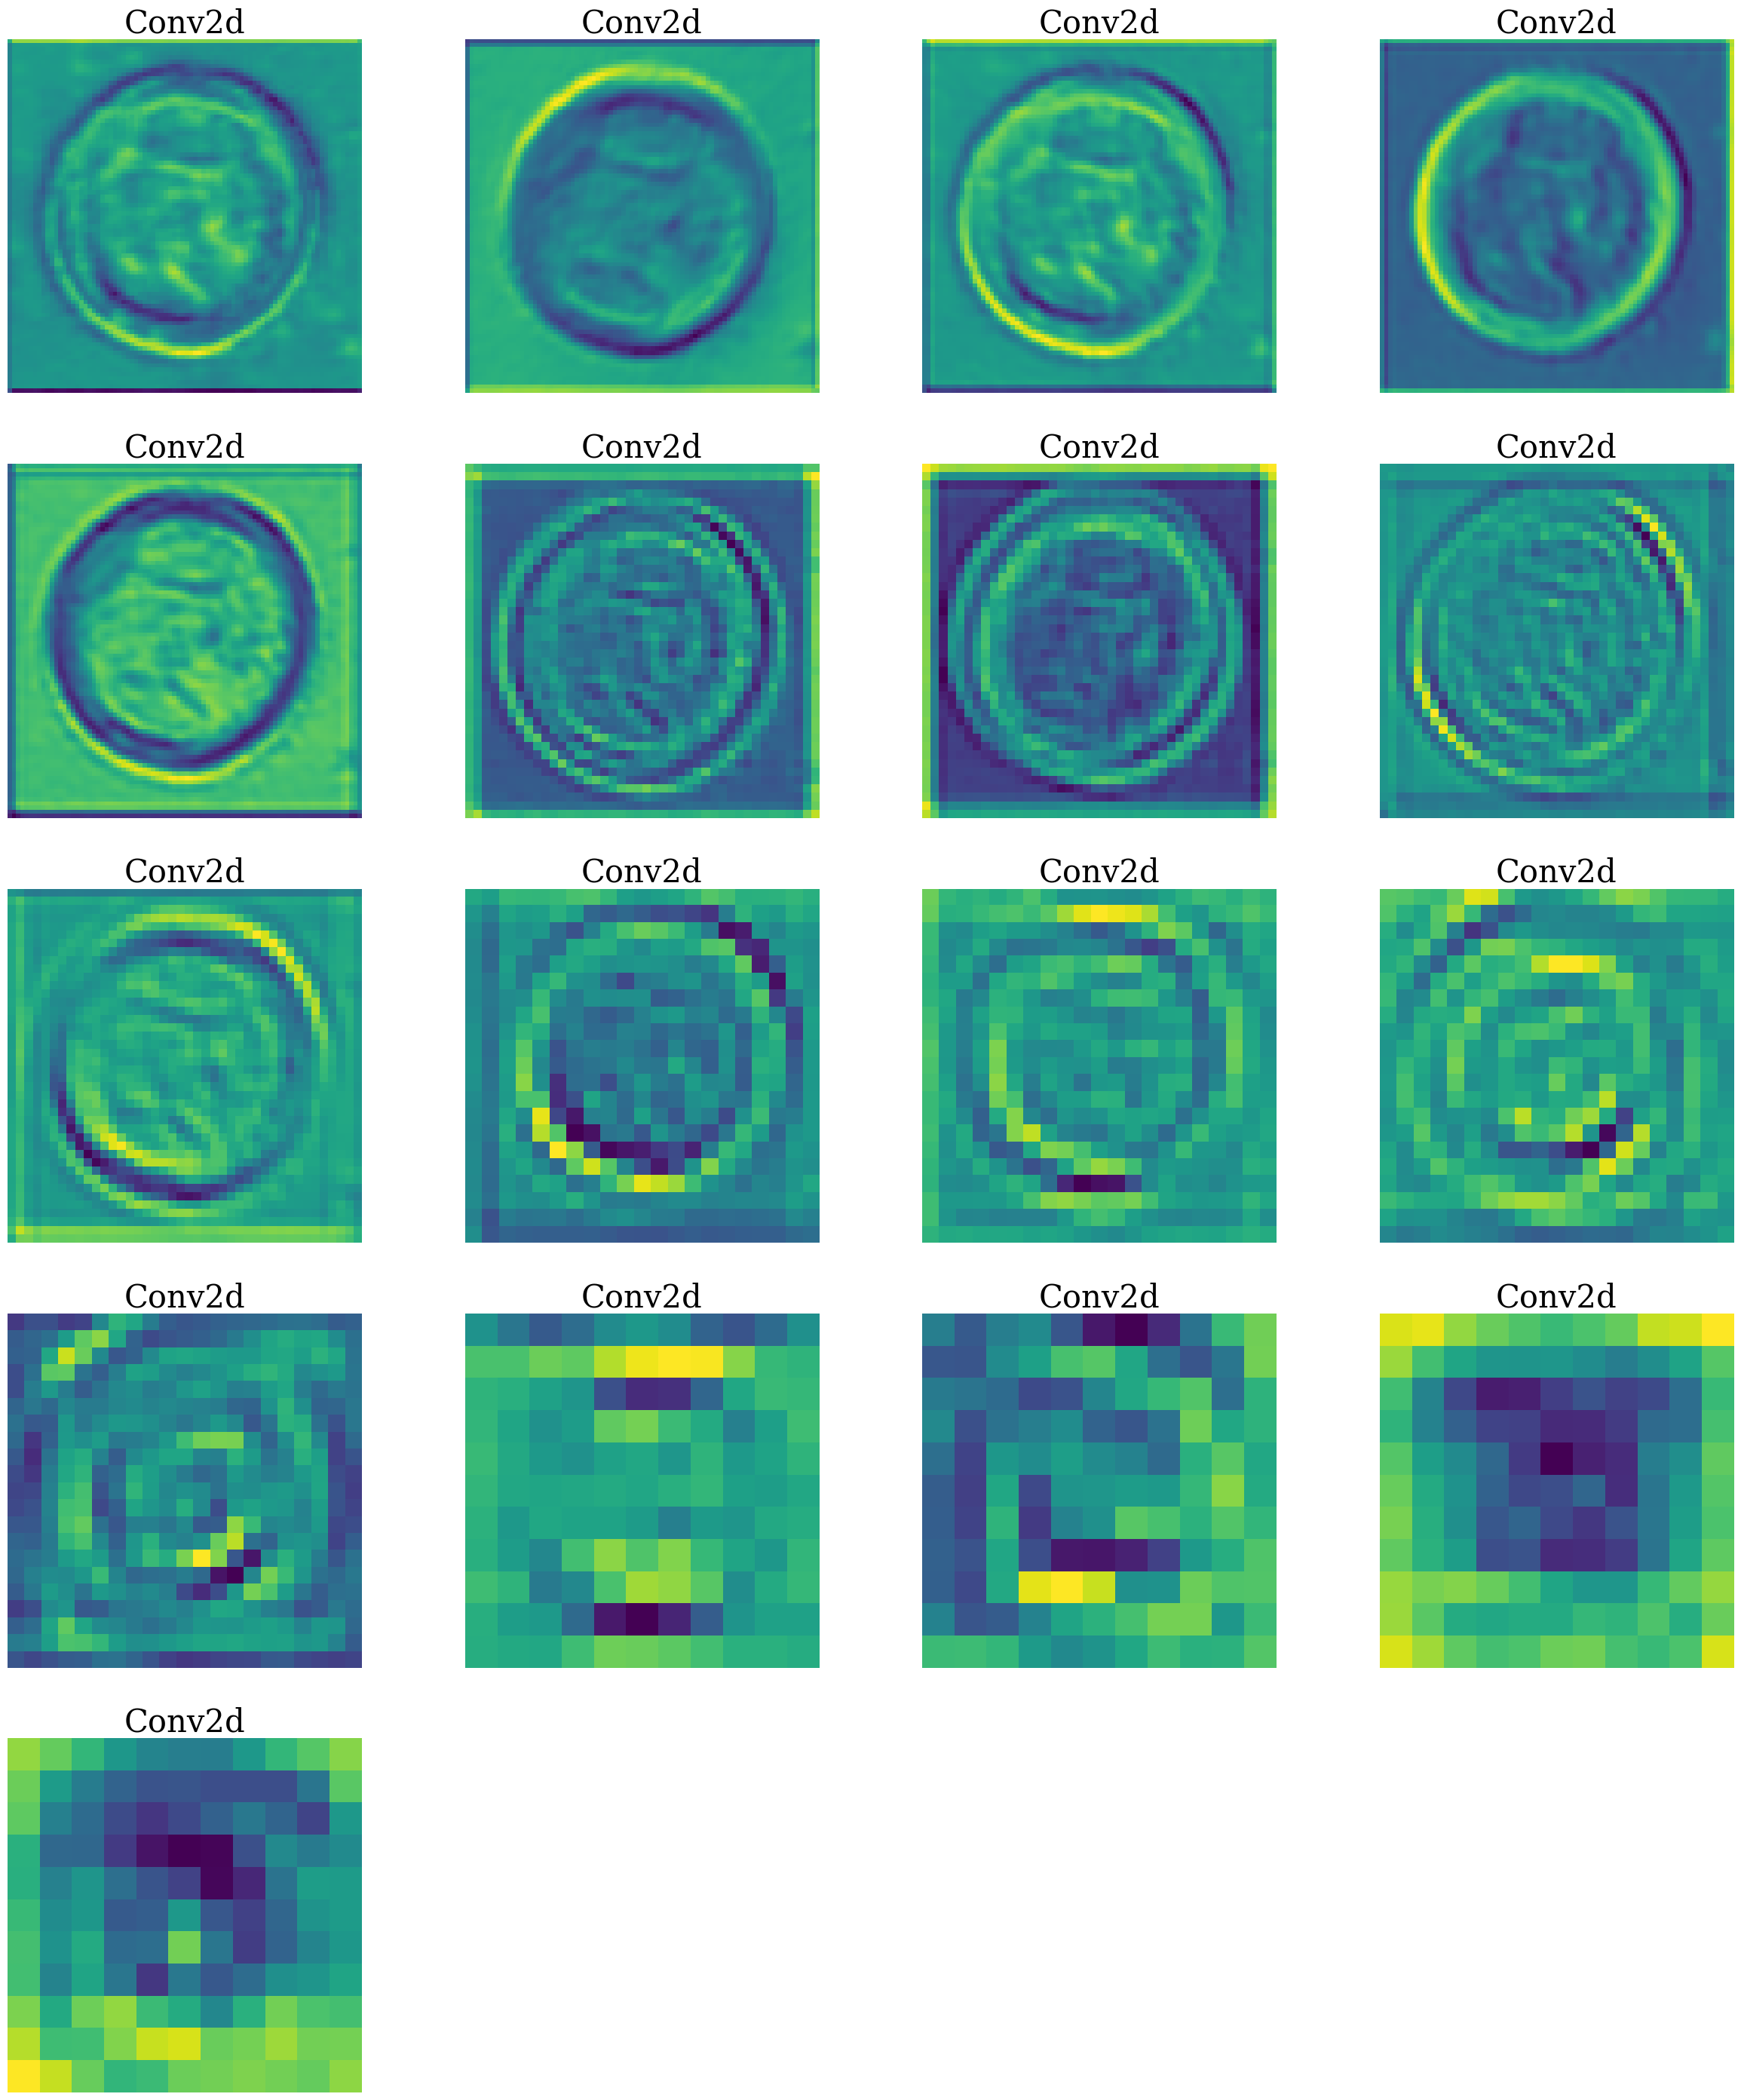

In [ ]:
# print Corylus avellana_well developed feature maps
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(7, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

An image of class2 (Corylus avellana_anomalous):


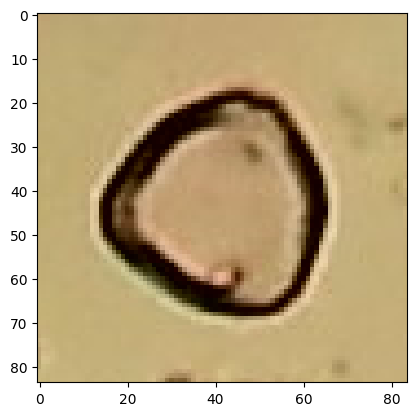

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
image = load_img('/content/OurPollen13K/train/2/20190404110723_OBJ_42_791_49.png')
data = img_to_array(image)
samples = np.expand_dims(data, 0)
print('An image of class2 (Corylus avellana_anomalous):')
plt.imshow(image)
plt.show()

In [ ]:
from torchvision import models, transforms, utils
transform = transforms.Compose([
    transforms.Resize((84, 84)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

In [ ]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 17
conv_layers


In [ ]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 84, 84])
Image shape after: torch.Size([1, 3, 84, 84])


In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
# print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(84, 84)
(84, 84)
(84, 84)
(84, 84)
(84, 84)
(42, 42)
(42, 42)
(42, 42)
(42, 42)
(21, 21)
(21, 21)
(21, 21)
(21, 21)
(11, 11)
(11, 11)
(11, 11)
(11, 11)


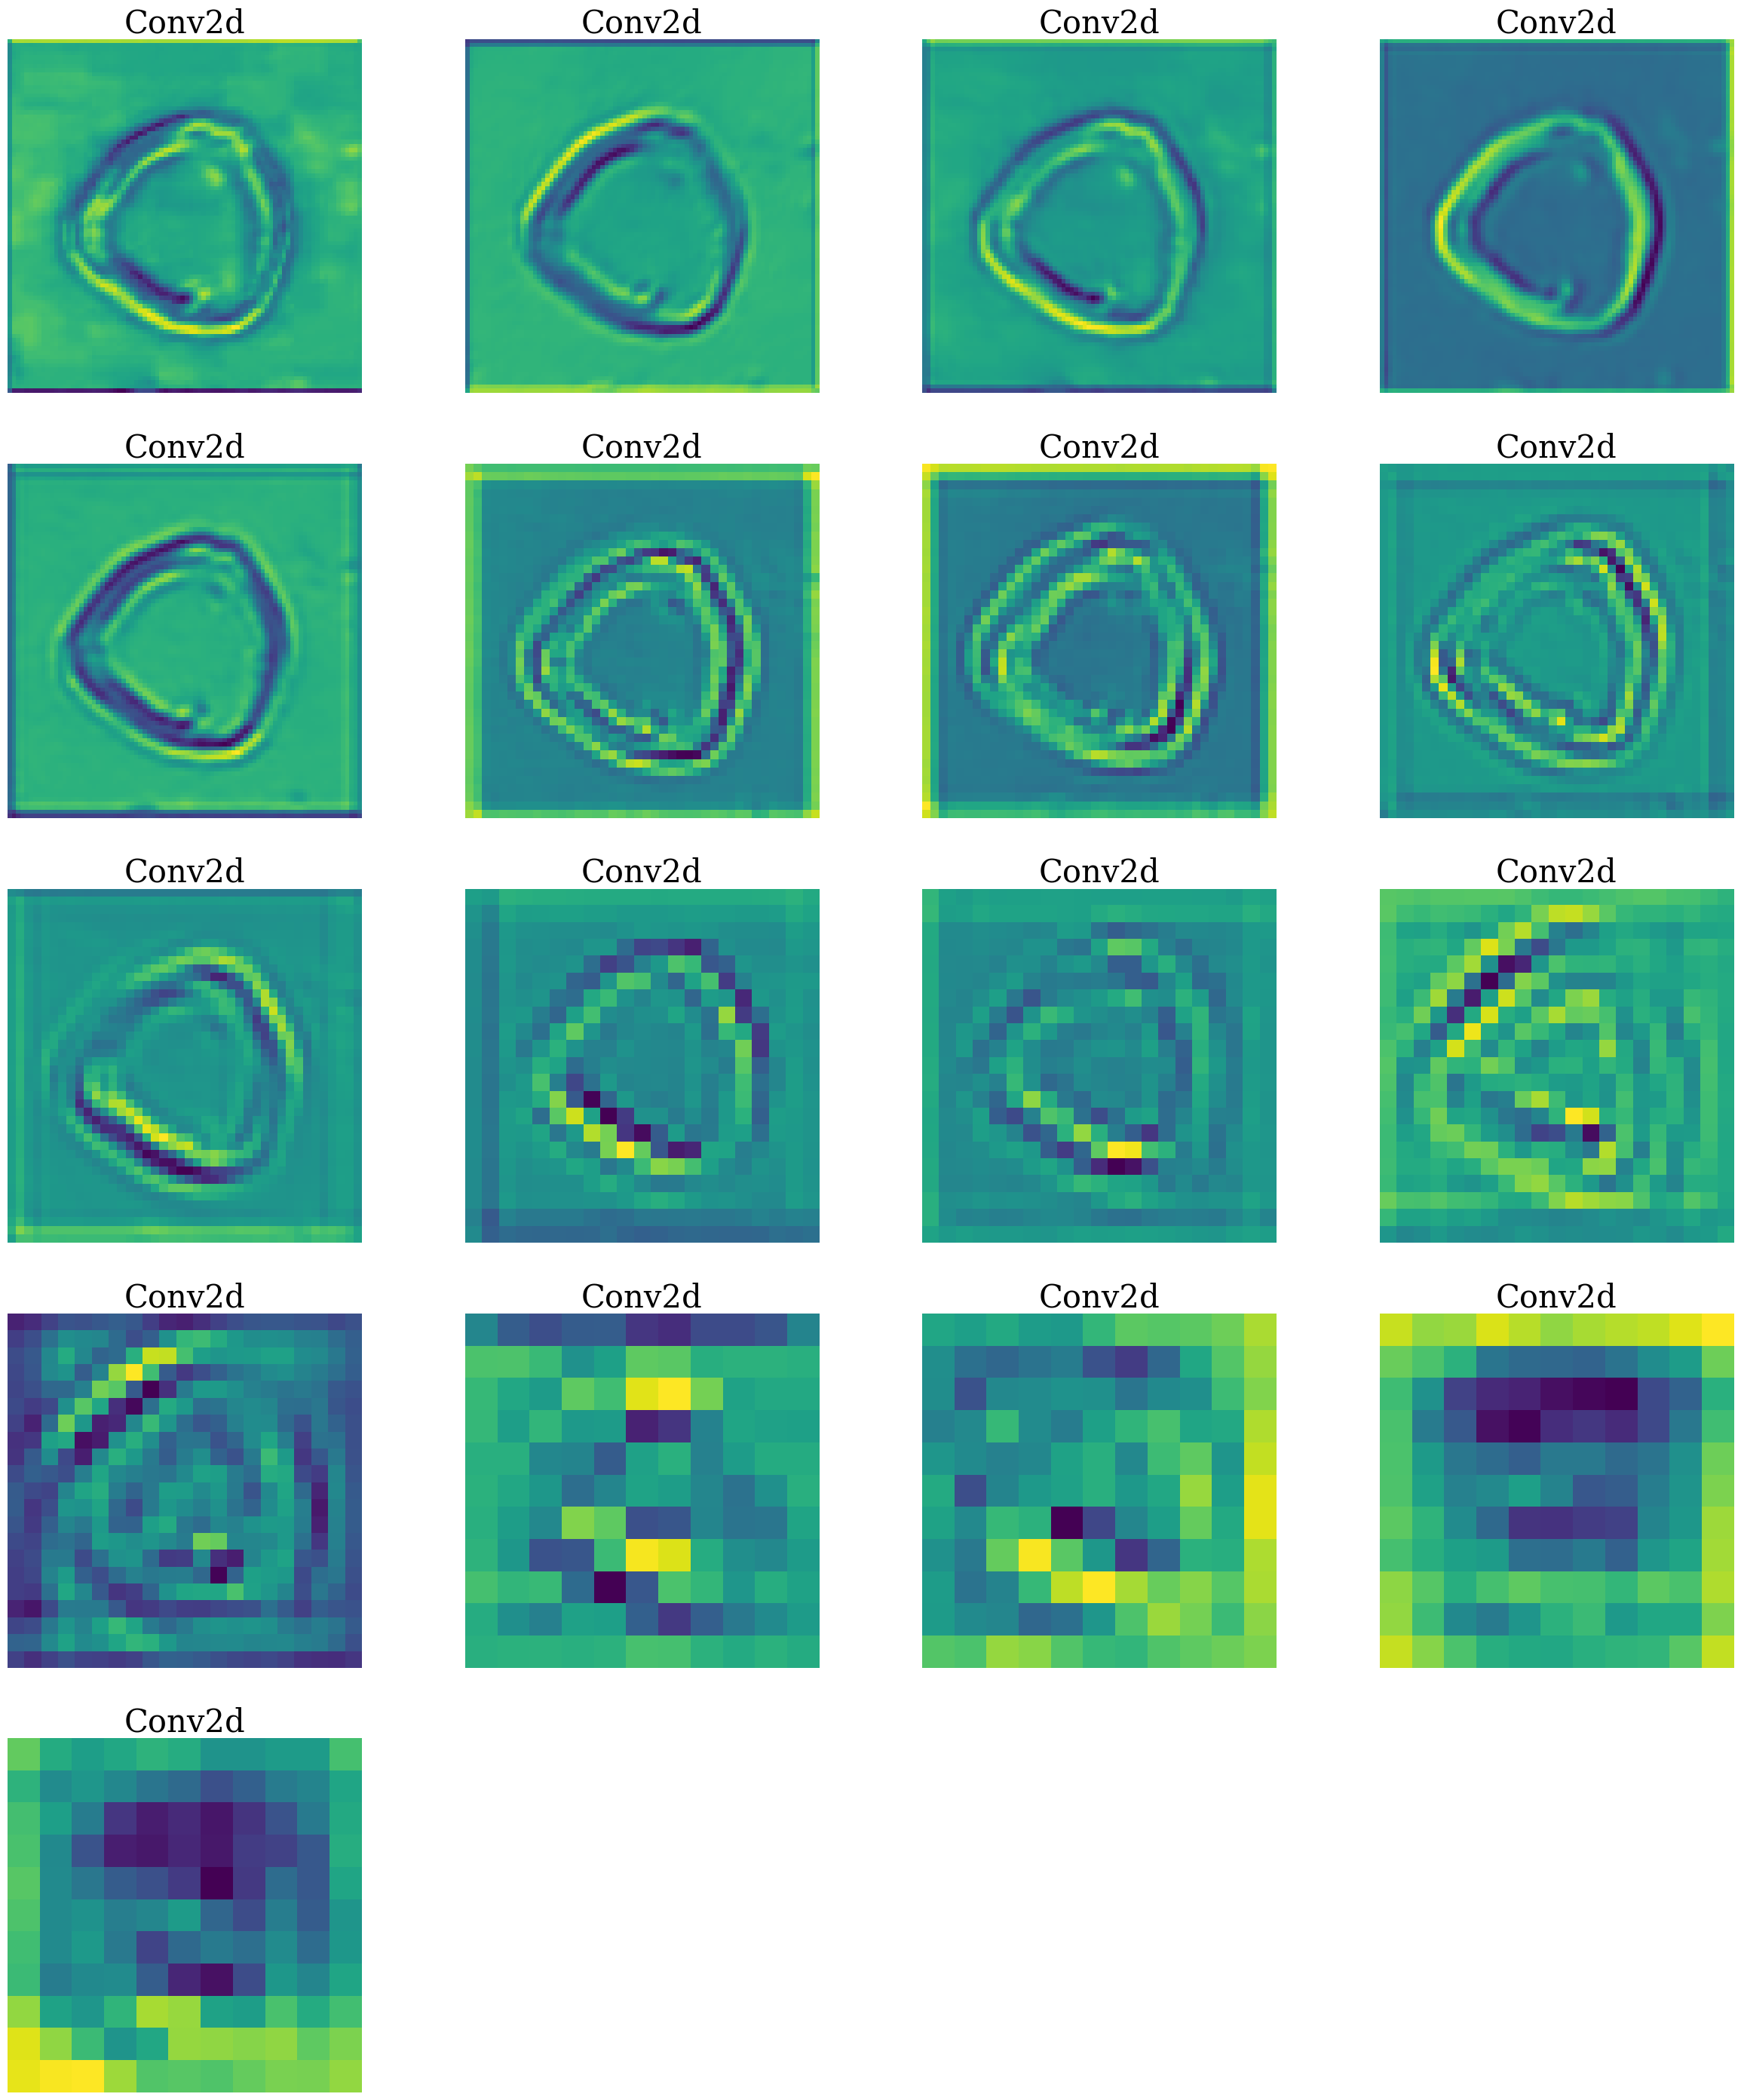

In [ ]:
# print Corylus avellana_anomalous feature maps
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(7, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

An image of class3 (Alnus__well developed):


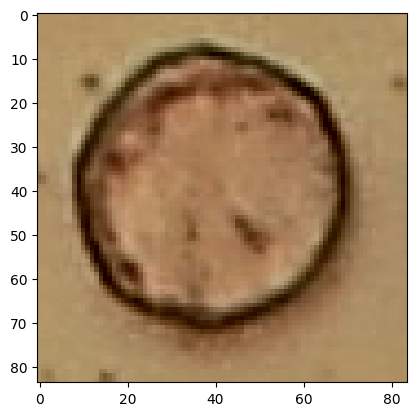

In [ ]:
import tensorflow
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
image = load_img('/content/OurPollen13K/train/3/20190404105005_OBJ_0_933_905.png')
data = img_to_array(image)
samples = np.expand_dims(data, 0)
print('An image of class3 (Alnus__well developed):')
plt.imshow(image)
plt.show()

In [ ]:
from torchvision import models, transforms, utils
transform = transforms.Compose([
    transforms.Resize((84, 84)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

In [ ]:
# we will save the conv layer weights in this list
model_weights =[]
# we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 17
conv_layers


In [ ]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 84, 84])
Image shape after: torch.Size([1, 3, 84, 84])


In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
# print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(84, 84)
(84, 84)
(84, 84)
(84, 84)
(84, 84)
(42, 42)
(42, 42)
(42, 42)
(42, 42)
(21, 21)
(21, 21)
(21, 21)
(21, 21)
(11, 11)
(11, 11)
(11, 11)
(11, 11)


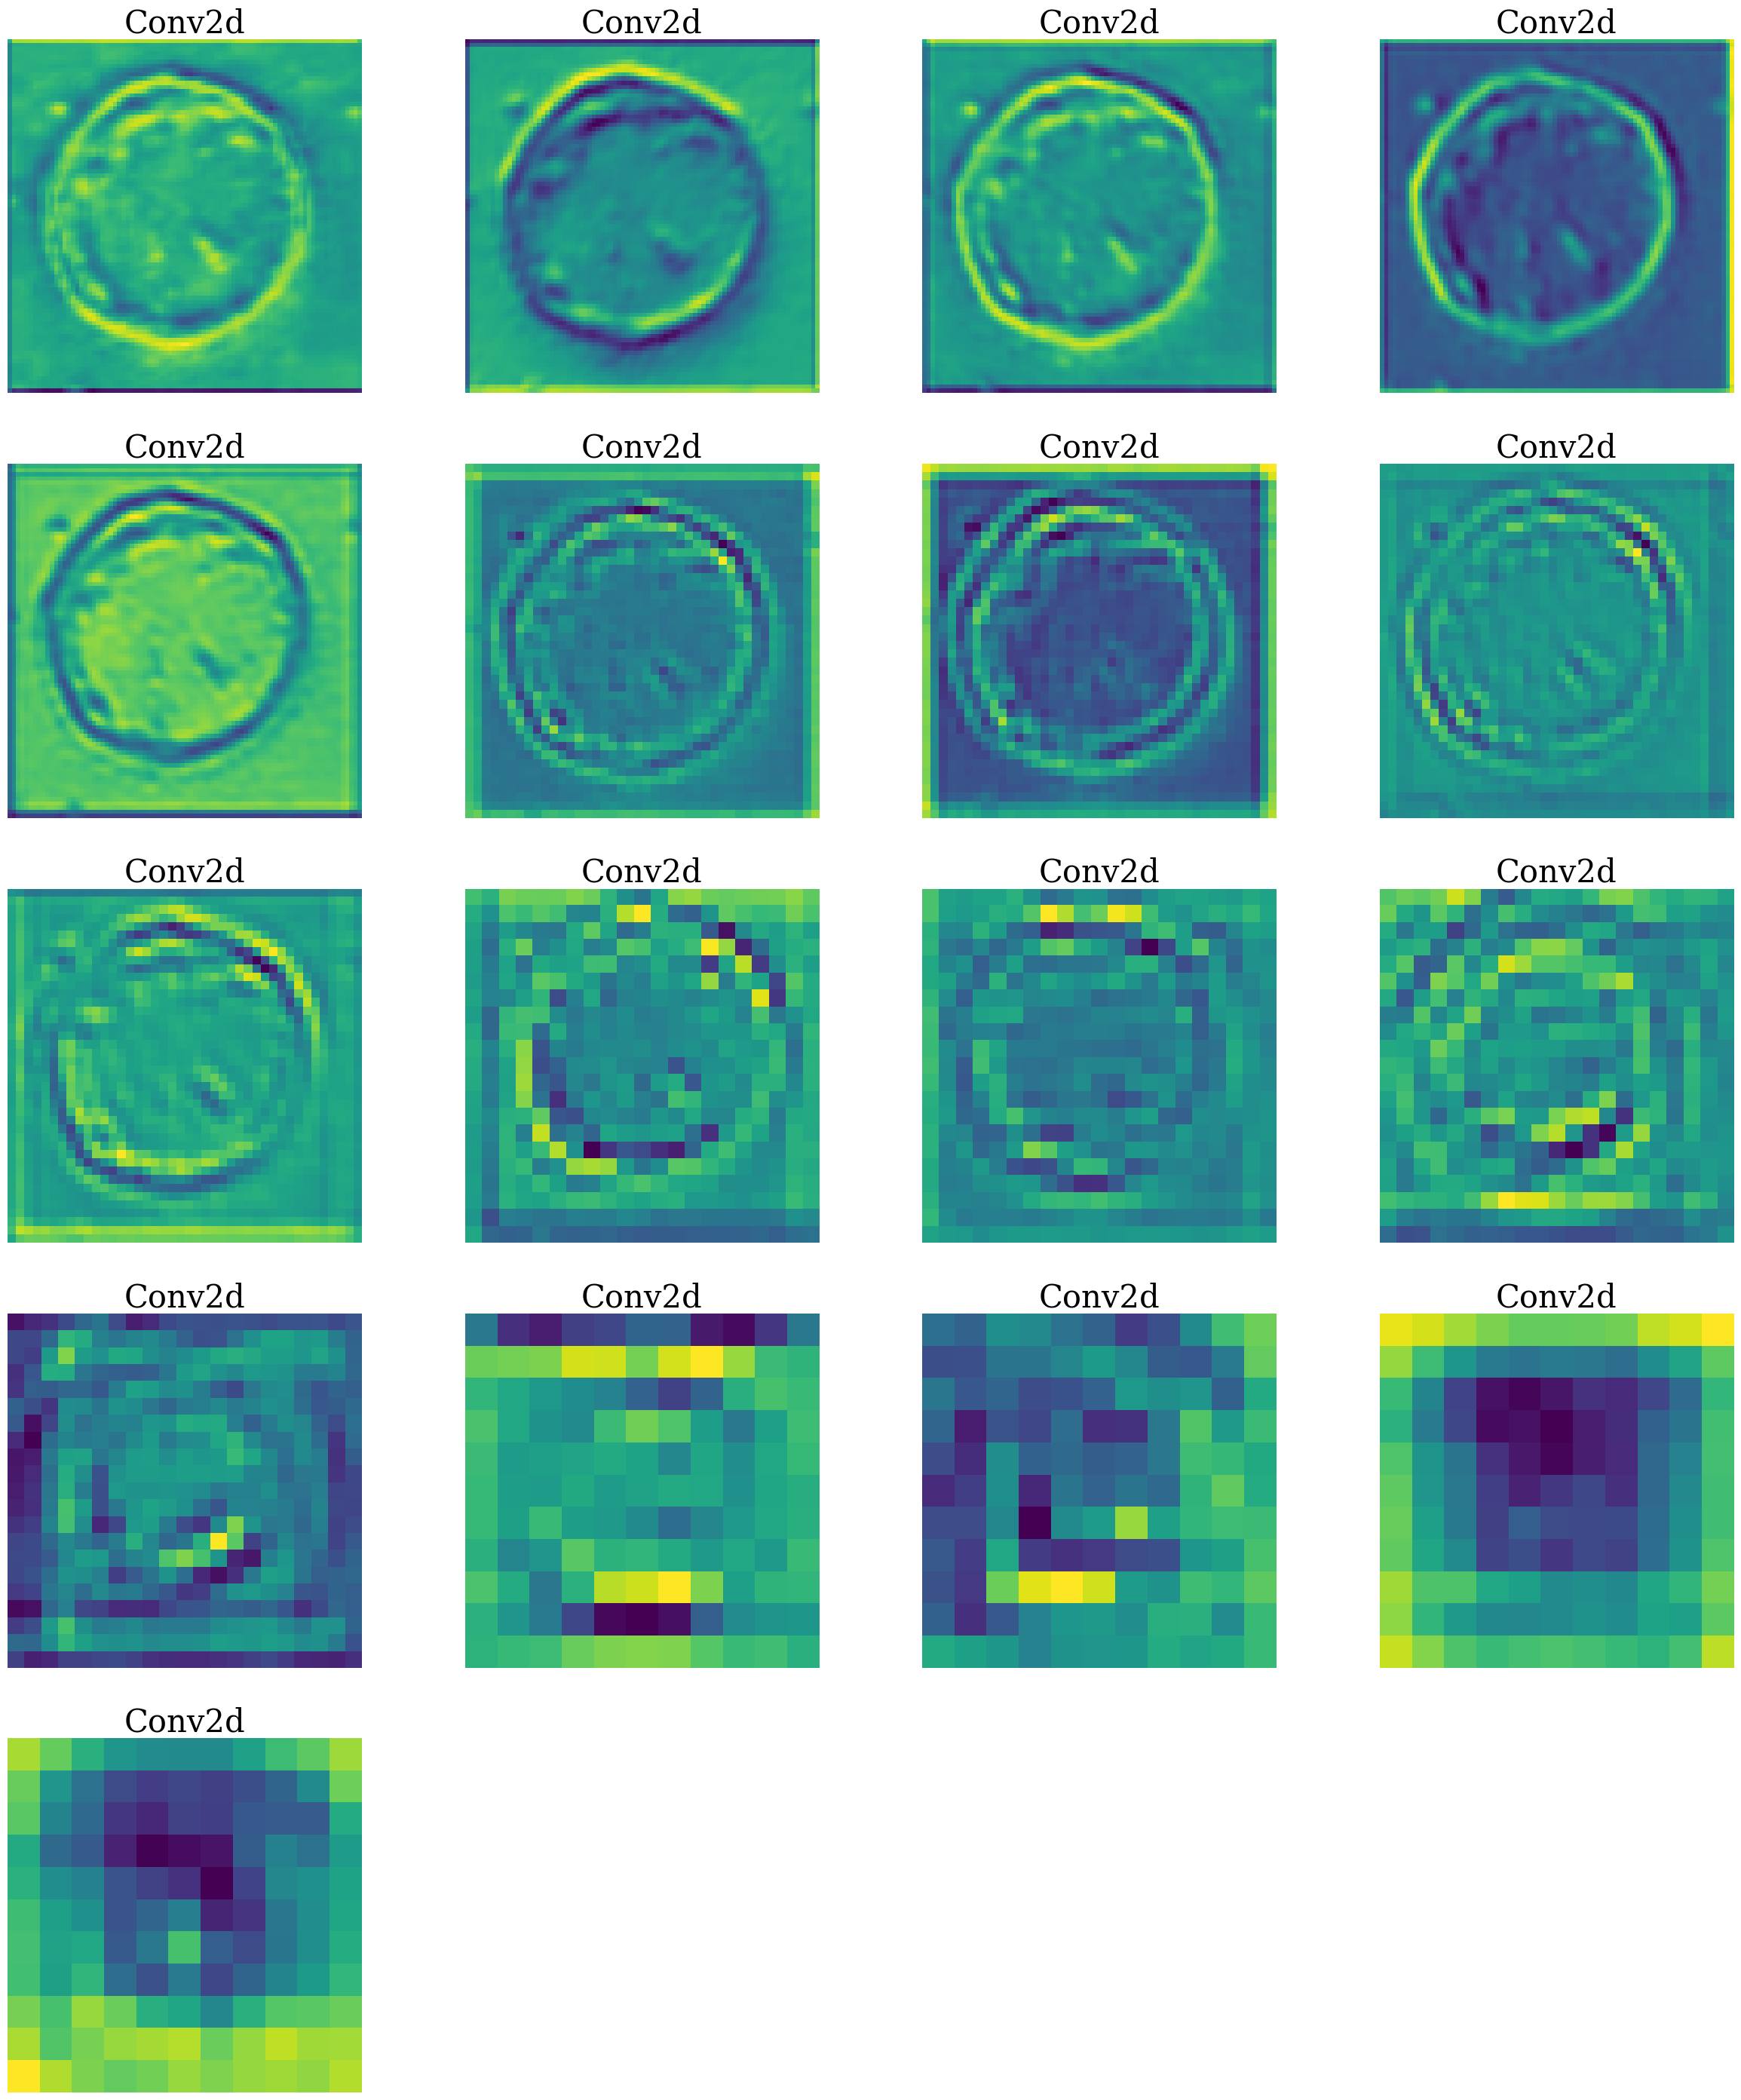

In [ ]:
# print Alnus__well developed feature maps
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(7, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

In [ ]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-tsqtmlns
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-tsqtmlns
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 09ac162e8f609eed02a8e35a370ef5bf30de19a1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=37447 sha256=17b6e3fc14c81d4e22867f95ec10070d856e9b555b2987ffa1e2a73fa039f2be
  Stored in directory: /tmp/pip-ephem-wheel-cache-lsj7bnu9/wheels/23/11/66/71a38b0c29ba4ec5f62105a2145278613855bc9c94eecf630d
Successfully built grad-cam


In [ ]:
import copy
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet18
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torchvision

In [ ]:
# Pick up layers for visualization
target_layers = [model.layer4[-1]]

Corylus avellana_well developed:


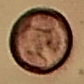

In [ ]:
path1 = ('/content/OurPollen13K/train/1/20190402165648_OBJ_0_1099_759.png') # this image must be converted to 84*84 pixels in the training set.
print('Corylus avellana_well developed:')
Image.open(path1).convert('RGB')

In [ ]:
rgb_img = Image.open(path1).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
# cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=False)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

Corylus avellana_well developed GradCAM:


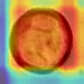

In [ ]:
# plot Corylus avellana_well developed GradCAM
print('Corylus avellana_well developed GradCAM:')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path1).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

Corylus avellana_well developed GradCAMPlusPlus


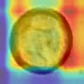

In [ ]:
# plot Corylus avellana_well developed GradCAMPlusPlus
print('Corylus avellana_well developed GradCAMPlusPlus')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path1).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
#cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=True)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

100%|██████████| 32/32 [00:01<00:00, 30.68it/s]


Corylus avellana_well developed ScoreCAM:


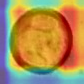

In [ ]:
# plot Corylus avellana_well developed ScoreCAM
print('Corylus avellana_well developed ScoreCAM:')
Image.fromarray(visualization, 'RGB')

Corylus avellana_anomalous:


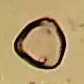

In [ ]:
path2 = ('/content/OurPollen13K/train/2/20190404110723_OBJ_42_791_49.png') # this image must be converted to 84*84 pixels in the training set.
print('Corylus avellana_anomalous:')
Image.open(path2).convert('RGB')

In [ ]:
rgb_img = Image.open(path2).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam1 = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
#cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam1 = cam1(input_tensor=input_tensor)

# In this example grayscale_cam1 has only one image in the batch:
grayscale_cam1 = grayscale_cam1[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam1, use_rgb=True)

Corylus avellana_anomalous GradCAM:


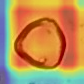

In [ ]:
# plot Corylus avellana_anomalous GradCAM
print('Corylus avellana_anomalous GradCAM:')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path2).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

Corylus avellana_anomalous GradCAMPlusPlus


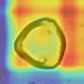

In [ ]:
# plot Corylus avellana_anomalous GradCAMPlusPlus
print('Corylus avellana_anomalous GradCAMPlusPlus')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path2).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
#cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=True)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

100%|██████████| 32/32 [00:01<00:00, 29.60it/s]


Corylus avellana_anomalous ScoreCAM:


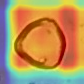

In [ ]:
# plot Corylus avellana_anomalous ScoreCAM
print('Corylus avellana_anomalous ScoreCAM:')
Image.fromarray(visualization, 'RGB')

Alnus__well developed:


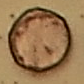

In [ ]:
path3 = ('/content/OurPollen13K/train/3/20190404105005_OBJ_0_933_905.png') # this image must be converted to 84*84 pixels in the training set.
print('Alnus__well developed:')
Image.open(path3).convert('RGB')

In [ ]:
rgb_img = Image.open(path3).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam1 = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
#cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam1 = cam1(input_tensor=input_tensor)

# In this example grayscale_cam1 has only one image in the batch:
grayscale_cam1 = grayscale_cam1[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam1, use_rgb=True)

Alnus__well developed GradCAM:


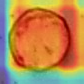

In [ ]:
# plot Alnus__well developed GradCAM
print('Alnus__well developed GradCAM:')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path3).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

Alnus__well developed GradCAMPlusPlus


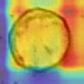

In [ ]:
# plot Alnus__well developed GradCAMPlusPlus
print('Alnus__well developed GradCAMPlusPlus')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path3).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
#cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=True)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

100%|██████████| 32/32 [00:00<00:00, 33.05it/s]


Alnus__well developed ScoreCAM:


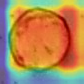

In [ ]:
# plot Alnus__well developed ScoreCAM
print('Alnus__well developed ScoreCAM:')
Image.fromarray(visualization, 'RGB')